## Documentacion modelo de prediccion, cross validate y matriz de confusion

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

Resultados cross_validate

In [4]:
def le_aux(row):
    if row <= 200: 
        return 0
    elif ((row > 200) & (row <= 400)):
        # print("hola")
        return 1
    elif ((row > 400) & (row <= 600)):
        # print("hola")
        return 2
    elif ((row > 600) & (row <= 900)):
        # print("hola")
        return 3
    elif row > 900:
        # print("hola")
        return 4

def crear_modelo():
    df19 = pd.read_csv(r"C:\Users\franc\OneDrive\Documentos\Henry\proyectos\PROYECTO_GRUPAL\SEMANA 4\traffic_19_modelo.csv")
    df18 = pd.read_csv(r"C:\Users\franc\OneDrive\Documentos\Henry\proyectos\PROYECTO_GRUPAL\SEMANA 4\traffic_18_modelo.csv")
    df = pd.concat([df18, df19])
    df = df[["Boro", "HH", "street", "Vol"]]
    le = LabelEncoder()
    df["Boro_le"] = le.fit_transform(df.Boro)
    df["street_le"] = le.fit_transform(df.street)
    df["Vol_le"] = df["Vol"].apply(lambda x: le_aux(x))
    tree = DecisionTreeClassifier()
    X = df[["HH", "Boro_le", "street_le"]].values
    y = df["Vol_le"].values
    y = y.reshape(-1, 1)

    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, stratify = y)

    # tree.fit(X_train, y_train)

    tree_scores = cross_validate(tree, X, y, cv = 5, scoring = "accuracy")

    return tree, df, tree_scores

In [5]:
tree, df, tree_scores = crear_modelo()
print(tree_scores)

{'fit_time': array([8.06180358, 7.85499883, 7.4254086 , 7.6314621 , 7.66300631]), 'score_time': array([0.15503693, 0.14803314, 0.15003443, 0.150033  , 0.15303493]), 'test_score': array([0.90267856, 0.90318614, 0.90578696, 0.90416867, 0.90300596])}


Resultados matriz de confusion

In [6]:
def le_aux(row):
    if row <= 200: 
        return 0
    elif ((row > 200) & (row <= 400)):
        # print("hola")
        return 1
    elif ((row > 400) & (row <= 600)):
        # print("hola")
        return 2
    elif ((row > 600) & (row <= 900)):
        # print("hola")
        return 3
    elif row > 900:
        # print("hola")
        return 4

def crear_modelo():
    df19 = pd.read_csv(r"C:\Users\franc\OneDrive\Documentos\Henry\proyectos\PROYECTO_GRUPAL\SEMANA 4\traffic_19_modelo.csv")
    df18 = pd.read_csv(r"C:\Users\franc\OneDrive\Documentos\Henry\proyectos\PROYECTO_GRUPAL\SEMANA 4\traffic_18_modelo.csv")
    df = pd.concat([df18, df19])
    df = df[["Boro", "HH", "street", "Vol"]]
    le = LabelEncoder()
    df["Boro_le"] = le.fit_transform(df.Boro)
    df["street_le"] = le.fit_transform(df.street)
    df["Vol_le"] = df["Vol"].apply(lambda x: le_aux(x))
    tree = DecisionTreeClassifier()
    X = df[["HH", "Boro_le", "street_le"]].values
    y = df["Vol_le"].values
    y = y.reshape(-1, 1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, stratify = y)

    tree.fit(X_train, y_train)

    # tree_scores = cross_validate(tree, X, y, cv = 5, scoring = "accuracy")

    return tree, X_test, y_test

<Figure size 720x720 with 0 Axes>

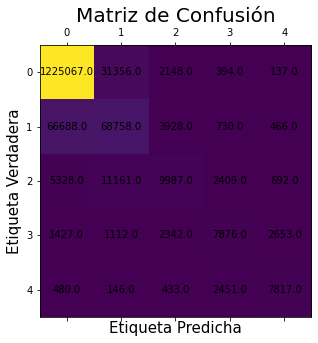

<Figure size 720x720 with 0 Axes>

In [10]:
tree, X_test, y_test = crear_modelo()
y_pred = tree.predict(X_test)

# Matriz de confusión 
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(10,5))
ax.matshow(cm)
plt.title('Matriz de Confusión', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

plt.figure(figsize = (10, 10))